In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')

/var/folders/kf/hx5km7bs4hg_5ytlj6pnz_100000gn/T/ipykernel_17914/3400341519.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# data = np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_sims/GPU_work/siggen_ccd/fields/ev_fin.dat')
data=pd.read_csv('/Users/kevinhbhimani/Desktop/siggen_sims/ICPC_fields/ev_fin.dat', comment='#', header=None, delim_whitespace=True)

In [4]:
data_np=data.to_numpy()
r_vals = data_np[:,0]
z_vals = data_np[:,1]
potential = data_np[:,2]
field = data_np[:,3]
field_r = data_np[:,4]
field_z = data_np[:,5]

In [5]:
num_skip=10
plt.scatter(r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Electric field for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

NameError: name 'cut' is not defined

In [6]:
print('mean and standard deviation of field are:', np.mean(field), np.std(field))

mean and standard deviation of field are: 687.110898812598 665.7871246699597


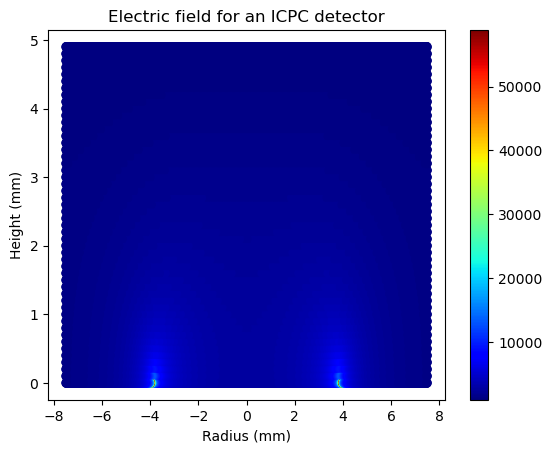

In [7]:
cut = (z_vals<5) & (r_vals>-7.5)&(r_vals<7.5)

num_skip=10
plt.scatter(r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Electric field for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

In [8]:
cut = (field>0)
num_skip=1
plt.scatter(r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=potential[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=potential[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Electric potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

In [138]:
data_wp=pd.read_csv('/Users/kevinhbhimani/Desktop/siggen_sims/GPU_work/siggen_ccd/fields/wp_p1.dat', comment='#', header=None, delim_whitespace=True)
data_wp_np=data_wp.to_numpy()
r_vals_wp = data_wp_np[:,0]
z_vals_wp = data_wp_np[:,1]
wp_vals = data_wp_np[:,2]


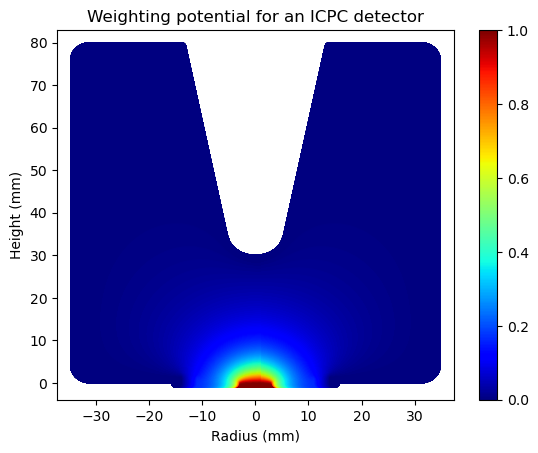

In [200]:
cut=(wp_vals>0)
num_skip=1
plt.scatter(r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Weighting potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

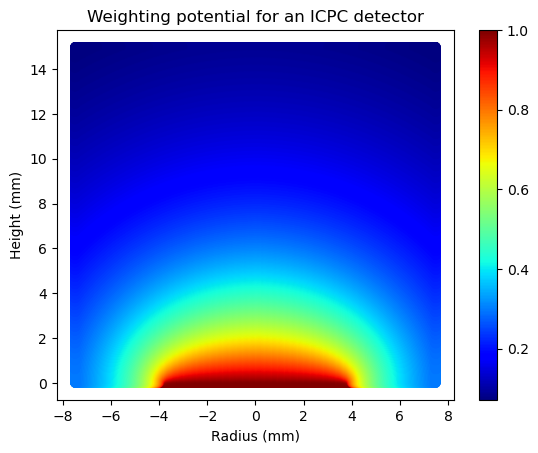

In [199]:
cut = (wp_vals>0) & (wp_vals<3000) & (z_vals<15) & (r_vals>-7.5)&(r_vals<7.5)
num_skip=1
plt.scatter(r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Weighting potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()